In [1]:
import pandas as pd
import joblib

df = pd.read_csv("train_features.csv")

target = "failure_24h"
X = df.drop(columns=[target, "RUL"])
y = df[target]

model = joblib.load("factoryguard_final_model.joblib")


In [2]:
from sklearn.model_selection import train_test_split

units = df["unit"].unique()

train_units, val_units = train_test_split(
    units,
    test_size=0.2,
    random_state=42
)

val_idx = df["unit"].isin(val_units)

X_val = X.loc[val_idx]
y_val = y.loc[val_idx]

In [3]:
import shap

# Extract trained LightGBM model
lgbm_model = model.named_steps["model"]

# Apply imputer transform first
X_val_imputed = model.named_steps["imputer"].transform(X_val)

explainer = shap.TreeExplainer(lgbm_model)
shap_values = explainer.shap_values(X_val_imputed)

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['sensor_1_roll_std_1' 'sensor_2_roll_std_1' 'sensor_3_roll_std_1'
 'sensor_4_roll_std_1' 'sensor_5_roll_std_1' 'sensor_6_roll_std_1'
 'sensor_7_roll_std_1' 'sensor_8_roll_std_1' 'sensor_9_roll_std_1'
 'sensor_10_roll_std_1' 'sensor_11_roll_std_1' 'sensor_12_roll_std_1'
 'sensor_13_roll_std_1' 'sensor_14_roll_std_1' 'sensor_15_roll_std_1'
 'sensor_16_roll_std_1' 'sensor_17_roll_std_1' 'sensor_18_roll_std_1'
 'sensor_19_roll_std_1' 'sensor_20_roll_std_1' 'sensor_21_roll_std_1']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/shap/explainers/_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


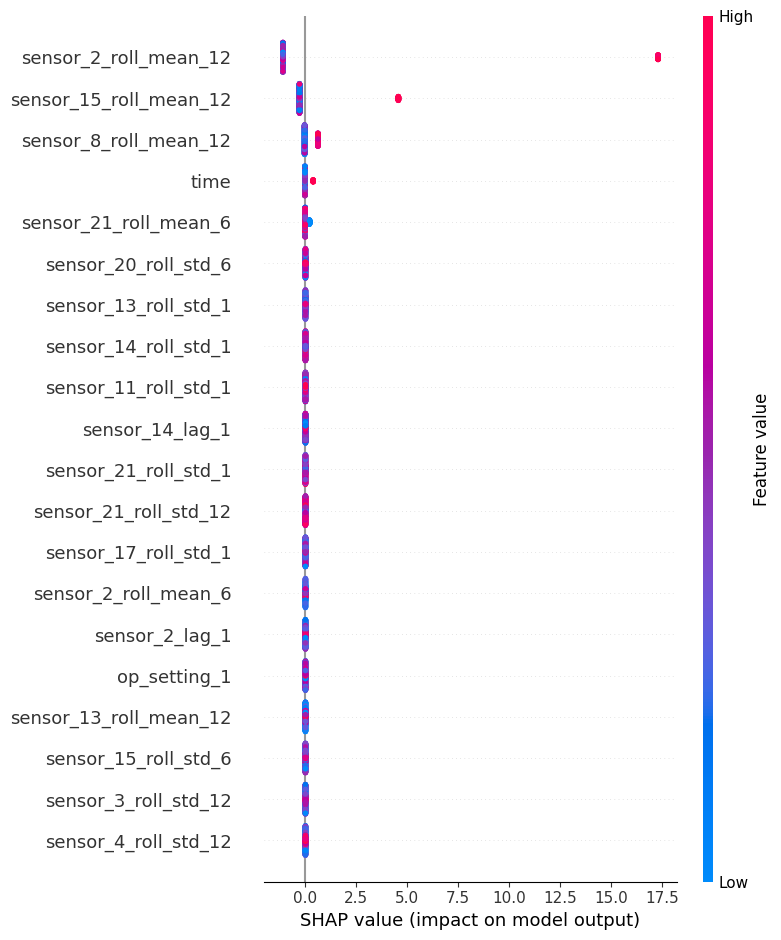

In [4]:
import matplotlib.pyplot as plt

shap.summary_plot(
    shap_values,
    X_val_imputed,
    feature_names=X_val.columns,
    show=False
)

plt.tight_layout()
plt.savefig("shap_global_importance.png", dpi=200)
plt.show()


In [5]:
import numpy as np

y_probs = model.predict_proba(X_val)[:, 1]

idx = np.argmax(y_probs)

idx, y_probs[idx]

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['sensor_1_roll_std_1' 'sensor_2_roll_std_1' 'sensor_3_roll_std_1'
 'sensor_4_roll_std_1' 'sensor_5_roll_std_1' 'sensor_6_roll_std_1'
 'sensor_7_roll_std_1' 'sensor_8_roll_std_1' 'sensor_9_roll_std_1'
 'sensor_10_roll_std_1' 'sensor_11_roll_std_1' 'sensor_12_roll_std_1'
 'sensor_13_roll_std_1' 'sensor_14_roll_std_1' 'sensor_15_roll_std_1'
 'sensor_16_roll_std_1' 'sensor_17_roll_std_1' 'sensor_18_roll_std_1'
 'sensor_19_roll_std_1' 'sensor_20_roll_std_1' 'sensor_21_roll_std_1']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


(np.int64(250), np.float64(0.999995302846996))

In [10]:
import numpy as np

y_probs = model.predict_proba(X_val)[:, 1]
idx = np.argmax(y_probs)

idx, y_probs[idx]

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['sensor_1_roll_std_1' 'sensor_2_roll_std_1' 'sensor_3_roll_std_1'
 'sensor_4_roll_std_1' 'sensor_5_roll_std_1' 'sensor_6_roll_std_1'
 'sensor_7_roll_std_1' 'sensor_8_roll_std_1' 'sensor_9_roll_std_1'
 'sensor_10_roll_std_1' 'sensor_11_roll_std_1' 'sensor_12_roll_std_1'
 'sensor_13_roll_std_1' 'sensor_14_roll_std_1' 'sensor_15_roll_std_1'
 'sensor_16_roll_std_1' 'sensor_17_roll_std_1' 'sensor_18_roll_std_1'
 'sensor_19_roll_std_1' 'sensor_20_roll_std_1' 'sensor_21_roll_std_1']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


(np.int64(250), np.float64(0.999995302846996))

In [11]:
shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[idx],
        base_values=explainer.expected_value,
        data=X_val_imputed[idx],
        feature_names=X_val.columns
    ),
    show=False
)

<Axes: >

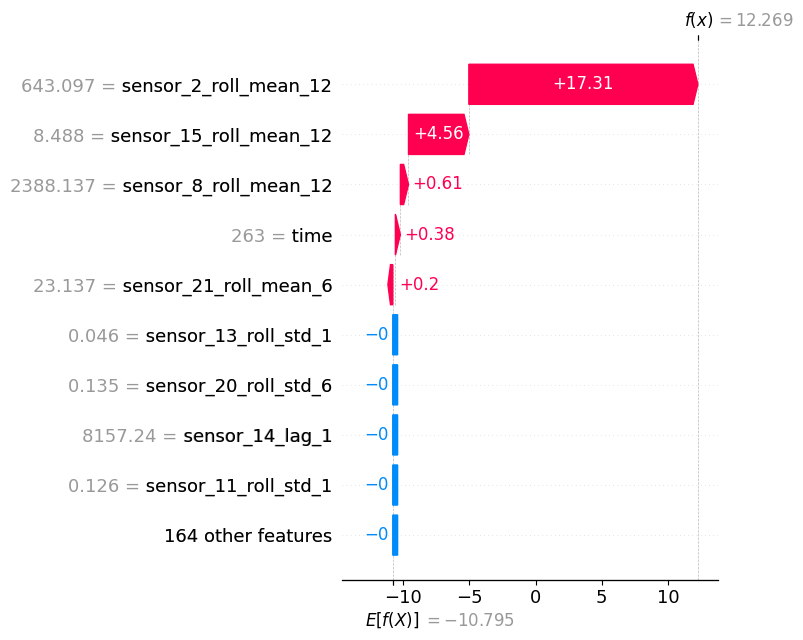

In [12]:
import matplotlib.pyplot as plt

plt.tight_layout()
plt.savefig("shap_single_prediction.png", dpi=200, bbox_inches="tight")
plt.show()